In [1]:
import numpy as np
import tensorflow as tf
from tensorflow.keras import layers, models
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from tqdm.keras import TqdmCallback

## Loading Data

In [2]:
data0 = np.load('data0.npy')
data1 = np.load('data1.npy')
data2 = np.load('data2.npy')
X = np.concatenate([data0, data1, data2], axis=0)

lab0 = np.load('lab0.npy')
lab1 = np.load('lab1.npy')
lab2 = np.load('lab2.npy')
y = np.concatenate([lab0, lab1, lab2], axis=0)

## Normalizing Data

In [3]:
X = X.astype('float32') / 255.0
X = np.expand_dims(X, axis=-1)  # Add channel dimension for grayscale images
y = tf.keras.utils.to_categorical(y, 37)  # Convert labels to one-hot encoding

## Train Test Val split

In [4]:
X_temp, X_test, y_temp, y_test = train_test_split(X, y, test_size=0.2, random_state=42)
X_train, X_val, y_train, y_val = train_test_split(X_temp, y_temp, test_size=0.25, random_state=42)

print(f"Training shape: {X_train.shape}, Validation shape: {X_val.shape}, Test shape: {X_test.shape}")

Training shape: (18000, 40, 168, 1), Validation shape: (6000, 40, 168, 1), Test shape: (6000, 40, 168, 1)


## Building the model

In [5]:
input_shape = X_train.shape[1:]  # (height, width, channels)
model = models.Sequential([
    layers.Conv2D(32, (3, 3), activation='relu', input_shape=input_shape),
    layers.BatchNormalization(),
    layers.MaxPooling2D((2, 2)),

    layers.Conv2D(64, (3, 3), activation='relu'),
    layers.BatchNormalization(),
    layers.MaxPooling2D((2, 2)),

    layers.Conv2D(128, (3, 3), activation='relu'),
    layers.BatchNormalization(),
    layers.MaxPooling2D((2, 2)),

    layers.Flatten(),
    layers.Dropout(0.5),
    layers.Dense(256, activation='relu'),
    layers.BatchNormalization(),
    layers.Dropout(0.5),
    layers.Dense(37, activation='softmax')
])

/usr/local/lib/python3.10/dist-packages/keras/src/layers/convolutional/base_conv.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


## Training the model

In [7]:
model.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])

print("Training model...")
history = model.fit(
    X_train, y_train,
    batch_size=32,
    epochs=100,
    validation_data=(X_val, y_val),
    callbacks=[TqdmCallback(verbose=1)]
)

Training model...


0epoch [00:00, ?epoch/s]

0batch [00:00, ?batch/s]

Epoch 1/100
563/563 ━━━━━━━━━━━━━━━━━━━━ 20s 24ms/step - accuracy: 0.4559 - loss: 1.6184 - val_accuracy: 0.1713 - val_loss: 2.4603
Epoch 2/100
563/563 ━━━━━━━━━━━━━━━━━━━━ 5s 9ms/step - accuracy: 0.4845 - loss: 1.5380 - val_accuracy: 0.1640 - val_loss: 2.4672
Epoch 3/100
563/563 ━━━━━━━━━━━━━━━━━━━━ 10s 10ms/step - accuracy: 0.5022 - loss: 1.4841 - val_accuracy: 0.1643 - val_loss: 2.5901
Epoch 4/100
563/563 ━━━━━━━━━━━━━━━━━━━━ 6s 10ms/step - accuracy: 0.5122 - loss: 1.4657 - val_accuracy: 0.1667 - val_loss: 2.4818
Epoch 5/100
563/563 ━━━━━━━━━━━━━━━━━━━━ 10s 10ms/step - accuracy: 0.5276 - loss: 1.4208 - val_accuracy: 0.1548 - val_loss: 2.6141
Epoch 6/100
563/563 ━━━━━━━━━━━━━━━━━━━━ 6s 10ms/step - accuracy: 0.5324 - loss: 1.3906 - val_accuracy: 0.1655 - val_loss: 2.5027
Epoch 7/100
563/563 ━━━━━━━━━━━━━━━━━━━━ 10s 10ms/step - accuracy: 0.5562 - loss: 1.3246 - val_accuracy: 0.1393 - val_loss: 2.7166
Epoch 8/100
563/563 ━━━━━━━━━━━━━━━━━━━━ 5s 9ms/step - accuracy: 0.5596 - loss: 1.3238 

## Saving the model and test set

In [8]:
model.save("cnn_model.h5")
print("Model saved as 'cnn_model.h5'")

np.save("X_test.npy", X_test)
np.save("y_test.npy", y_test)
print("Test set saved as 'X_test.npy' and 'y_test.npy'")

Model saved as 'cnn_model.h5'
Test set saved as 'X_test.npy' and 'y_test.npy'


## Plot Training History

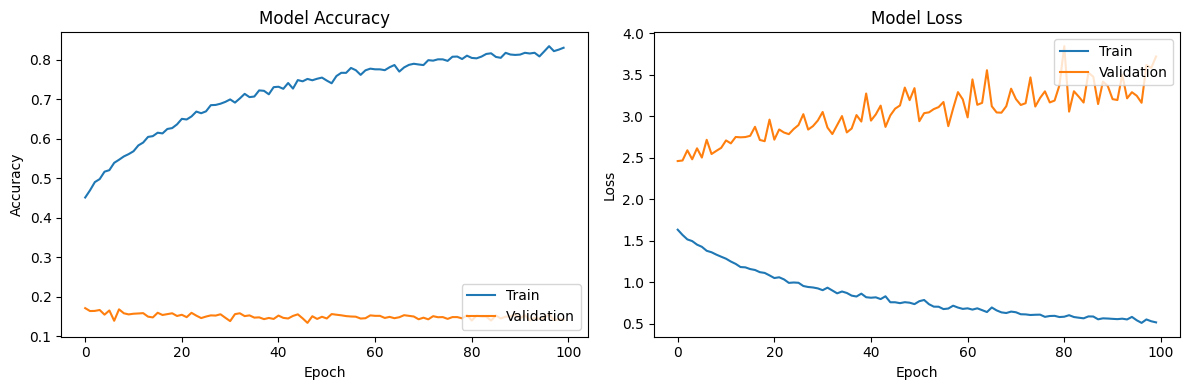

In [9]:
    fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(12, 4))

    # Plot training & validation accuracy
    ax1.plot(history.history['accuracy'])
    ax1.plot(history.history['val_accuracy'])
    ax1.set_title('Model Accuracy')
    ax1.set_ylabel('Accuracy')
    ax1.set_xlabel('Epoch')
    ax1.legend(['Train', 'Validation'], loc='lower right')

    # Plot training & validation loss
    ax2.plot(history.history['loss'])
    ax2.plot(history.history['val_loss'])
    ax2.set_title('Model Loss')
    ax2.set_ylabel('Loss')
    ax2.set_xlabel('Epoch')
    ax2.legend(['Train', 'Validation'], loc='upper right')

    plt.tight_layout()
    plt.show()